# Customer Segmentation Analysis


**What is customer segmentation analysis?**

Customer segmentation analysis is a powerful technique used by businesses to gain insights into their customer base and identify distinct groups of customers with similar characteristics and behaviors. By dividing customers into segments, businesses can understand their diverse needs, preferences, and purchasing patterns, allowing for more targeted marketing strategies, personalized customer experiences, and improved business outcomes.



**How to perform customer segmentation analysis?**

Customer segmentation analysis involves the use of analytical methods and algorithms to categorize customers into homogeneous groups based on a variety of attributes such as demographics, geographic location, purchasing history, product preferences, and more. By clustering customers with similar traits, businesses can uncover hidden patterns and trends within their customer data, enabling them to make data-driven decisions and optimize their marketing efforts.

**What are we exploring today?**

We will explore a bike sales dataset.Through this analysis, we aim to discover meaningful customer segments within the dataset, unravel the distinct characteristics and preferences of each segment, and derive actionable insights to inform marketing strategies and business decision-making. By applying the widely-used K-means clustering algorithm and leveraging key features like customer age, gender, location, and product preferences, we will uncover patterns and trends that can help us better understand and serve our customers.

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1. Data Preparation

 Load the dataset and prepare the data for customer segmentation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [ ]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2. Exploratory Analysis and Visualization

In [ ]:
df.head()
# Explore the dataset ...



,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##3. Preprocess the dataset

In [ ]:
# Drop irrelevant columns
df = df.drop(['Date', 'Day', 'Month', 'Year'], axis=1)

In [ ]:
df.head()

,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 4. Perform customer segmentation

In [ ]:
# Feature selection
features = ['Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State',
            'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity',
            'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


In [ ]:
# Subset the data
X = df[features]

In [ ]:
# Encode categorical attributes using one-hot encoding
categorical_attributes = ['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

# Apply one-hot encoding to each categorical attribute
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(X[categorical_attributes])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_attributes))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Concatenate the encoded features with the remaining numerical features
X_encoded = pd.concat([X.drop(categorical_attributes, axis=1), encoded_df], axis=1)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

K-means is an unsupervised machine learning algorithm that groups similar data points into a predefined number of clusters. This algorithm aims to minimize the sum of squared distances between data points and their cluster centroids.



In [ ]:
# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 5. Analyze segments

In [ ]:
# Assign the segment labels to the original dataset
df['Segment'] = kmeans.labels_

# Segment counts
segment_counts = df['Segment'].value_counts()
print("\nSegment Counts:")
print(segment_counts)

# Segment means
segment_means = df.groupby('Segment').mean()
print("\nSegment Means:")
print(segment_means)


Segment Counts:
0    81218
3    25596
4     4028
1     1806
2      388
Name: Segment, dtype: int64

Segment Means:
         Customer_Age  Order_Quantity    Unit_Cost   Unit_Price      Profit  \
Segment                                                                       
0           36.049299       15.010675     9.520894    20.871556  133.072324   
1           36.369878       15.299557     3.004430     8.001107   64.287375   
2           32.206186        1.487113   713.000000  1120.000000  407.497423   
3           35.397171        1.402172  1137.933662  1913.016721  796.621269   
4           36.769116       15.412363     8.000000    22.000000  185.874379   

                Cost      Revenue  
Segment                            
0         136.968517   270.040841  
1          46.013843   110.301218  
2        1060.311856  1467.809278  
3        1599.251797  2395.873066  
4         123.298908   309.173287  


<ipython-input-44-c7b41c7b5374>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = df.groupby('Segment').mean()


### Visulization of analysis

Bar plot of segment counts: this plot shows the count of customers in each segment, providing an overview of the segment distribution.

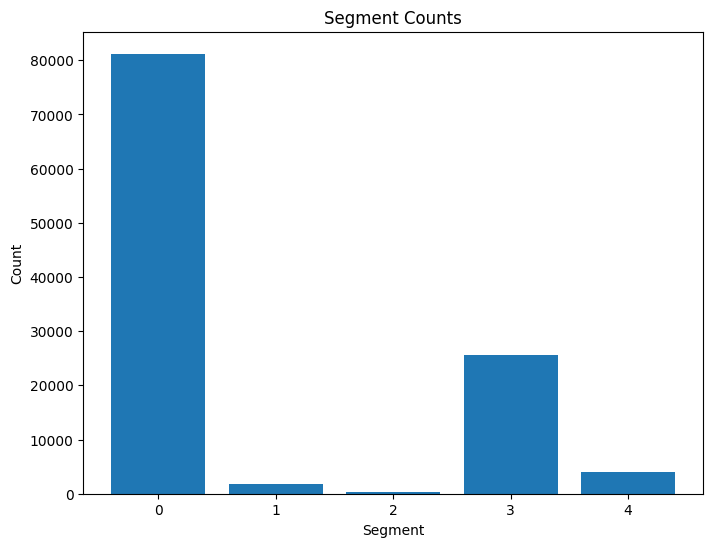

In [ ]:
# Bar plot of segment counts
segment_counts = df['Segment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Counts')
plt.show()



Box plot of customer age by segment: this plot visualizes the distribution of customer ages within each segment, allowing us to compare the age characteristics across segments.

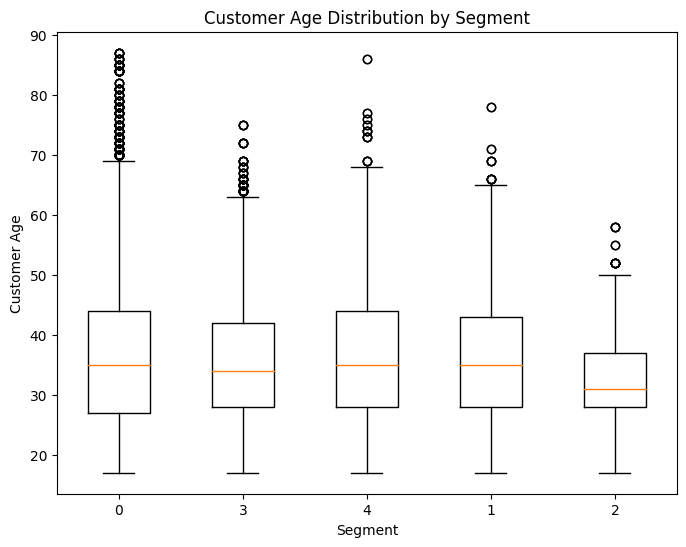

In [ ]:
# Box plot of customer age by segment
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Segment'] == i]['Customer_Age'] for i in segment_counts.index], labels=segment_counts.index)
plt.xlabel('Segment')
plt.ylabel('Customer Age')
plt.title('Customer Age Distribution by Segment')
plt.show()




Scatter plot of unit price and profit by segment: this plot displays the relationship between unit price and profit for different segments. Each segment is plotted separately, allowing us to observe any patterns or differences in the relationship.

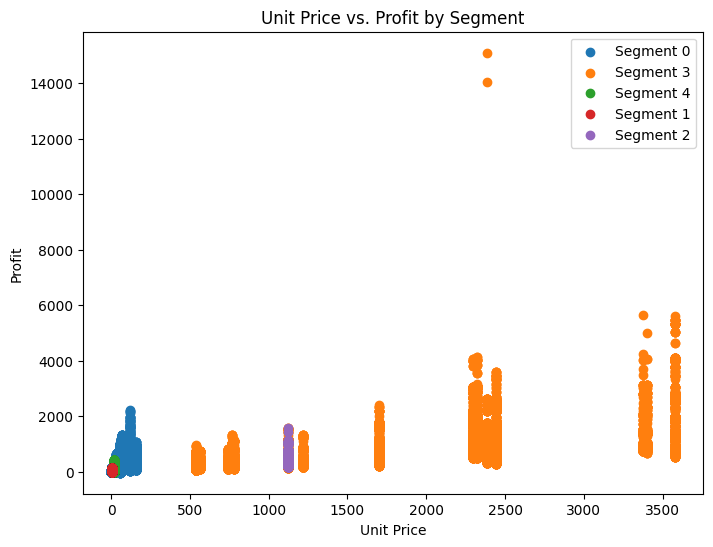

In [ ]:
# Scatter plot of unit price and profit by segment
plt.figure(figsize=(8, 6))
for segment in segment_counts.index:
    segment_data = df[df['Segment'] == segment]
    plt.scatter(segment_data['Unit_Price'], segment_data['Profit'], label=f'Segment {segment}')
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.title('Unit Price vs. Profit by Segment')
plt.legend()
plt.show()



Heatmap of segment means: this heatmap provides a visual representation of the average values for each attribute within each segment. The color intensity indicates the magnitude of the attribute value, allowing for a quick comparison of segment characteristics.

<ipython-input-48-4d7a84ded5da>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = df.groupby('Segment').mean()


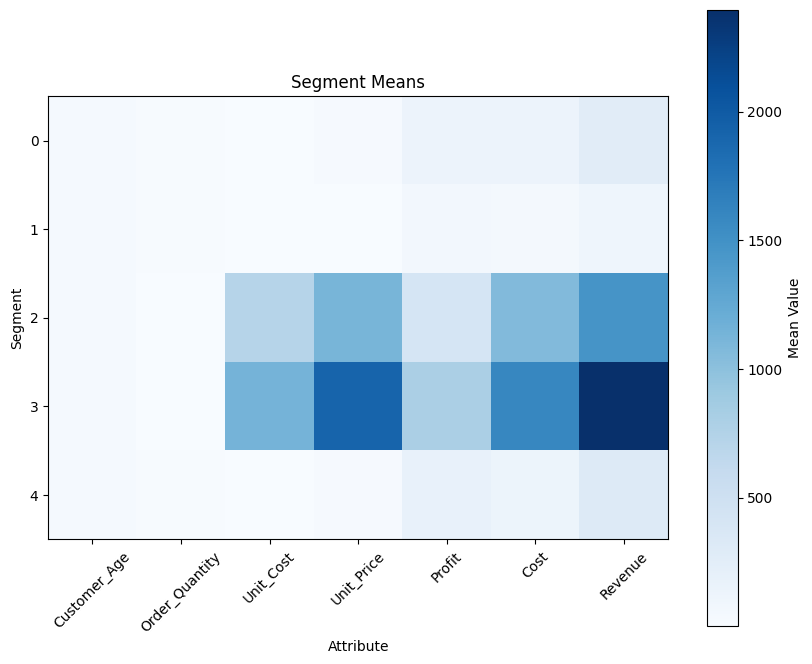

In [ ]:
# Heatmap of segment means
segment_means = df.groupby('Segment').mean()
plt.figure(figsize=(10, 8))
plt.imshow(segment_means.values, cmap='Blues')
plt.xticks(range(len(segment_means.columns)), segment_means.columns, rotation=45)
plt.yticks(range(len(segment_means.index)), segment_means.index)
plt.colorbar(label='Mean Value')
plt.xlabel('Attribute')
plt.ylabel('Segment')
plt.title('Segment Means')
plt.show()

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercise Activities

Exercise 1:
Try different values of k

In [ ]:
## Your code




# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## What's Next?



In conclusion, customer segmentation analysis is a powerful technique that enables businesses to better understand their customers, tailor marketing strategies, and drive business growth.

Remember, customer segmentation is an ongoing process, and it should be regularly reviewed, updated, and validated to ensure its relevance and effectiveness. By continuously refining the customer segmentation analysis and leveraging the insights gained, businesses can effectively meet the needs of their diverse customer base, drive customer satisfaction and loyalty, and achieve sustainable growth in today's competitive market.